p_500=9
alpha_500=9
beta_500=9
p_1000=10
alpha_1000=10
beta_100=10
p_1000=9
alpha_1000=9
beta_100=9
[0.3204496503688474, 0.29390972543854027, 0.32828683329946917, 0.21696900879698752, 0.3281053170355339, 0.3212173353310018, 0.2974126916054179, 0.2409029139014037, 0.2013808032027623]


<Figure size 640x480 with 0 Axes>

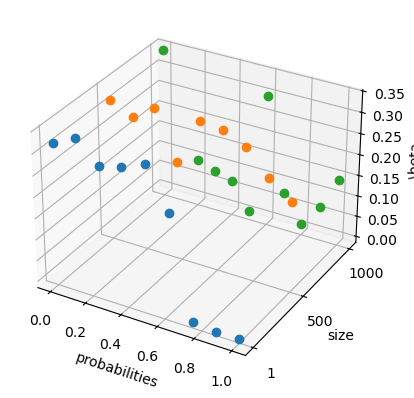

In [3]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
fig=plt.figure()
ax = plt.figure().add_subplot(111,projection='3d')

c_list = []
colors = ('r', 'g', 'b', 'k')

p_500=[0 ,       0.00016667, 0.00033333, 0.0005,     0.00066667, 0.00083333,0.001, 0.00116667, 0.00133333]
p_500=np.array(p_500)*300
alpha_500=[ 0.4626892,0.59669914, 0.62661771, 0.61084323, 0.60828341, 0.59210521, 0.62816246, 0.64208019,0.59757081]
beta_500=[np.float64(0.3204496503688474), np.float64(0.29390972543854027), np.float64(0.32828683329946917), np.float64(0.21696900879698752), np.float64(0.3281053170355339), 
 np.float64(0.3212173353310018), np.float64(0.2974126916054179), np.float64(0.2409029139014037), np.float64(0.2013808032027623)]

print(f'p_500={len(p_500)}')
print(f'alpha_500={len(alpha_500)}')
print(f'beta_500={len(beta_500)}')

p_1000=[0, 1e-05, 1.5e-05, 2e-05, 2.5e-05, 3e-05, 3.5e-05, 4e-05, 4.5e-05, 5e-05]
p_1000=np.array(p_1000)*20000
alpha_1000=[ 0.50423229,0.70598515 ,0.70540182 ,0.68625507 ,0.66039106,0.64743809,0.6733533 ,0.67029626 ,0.66920015,0.67063507]
beta_1000=[np.float64(0.3455608546588189), np.float64(0.09761253582555585), np.float64(0.08189717249530705), np.float64(0.0690440137219276), np.float64(0.005546298766566502), np.float64(0.30081907411109593), np.float64(0.07728353168538357), np.float64(0.01277962676400151), np.float64(0.06696479377968895), np.float64(0.1454162964637654)]


print(f'p_1000={len(p_1000)}')
print(f'alpha_1000={len(alpha_1000)}')
print(f'beta_100={len(beta_1000)}')

p_1=[0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4]
alpha_1=[np.float64(0.46268919506882333), np.float64(0.5077476923610046), np.float64(0.5292780770852075), np.float64(0.5242541799013171), np.float64(0.573242473014759), np.float64(0.5947347559730042),
  np.float64(0.2945618722584625), np.float64(0.15517322400441555), np.float64(0.11301688886936709)]
beta_1=[np.float64(0.3204496503688474), np.float64(0.34538024027088815), np.float64(0.298085425230953), np.float64(0.30954859352970704), np.float64(0.3313552221979226),
         np.float64(0.23697025876319017), np.float64(0.00020995952293823675), np.float64(-0.007599023393606359), np.float64(-0.005958786370287067)]


print(f'p_1000={len(p_1)}')
print(f'alpha_1000={len(alpha_1)}')
print(f'beta_100={len(beta_1)}')

p=[p_1,p_500,p_1000]
beta=[beta_1,beta_500,beta_1000]
alpha=[alpha_1,alpha_500,alpha_1000]


print(beta[1])

for y in list(range(0,3)):
        
    ax.plot((p[y])/np.max(p[y]),beta[y],y,zdir="y",marker='o',linestyle='')



plt.xlabel('probabilities')
plt.ylabel('size')
ax.set_zlabel(r"\beta")
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['1', '500', '1000'])
plt.show()


In [4]:
import plotly.graph_objects as go
import numpy as np


names = ['1', '500', '1000']

# =============================================
# Build interactive plot
# =============================================
fig = go.Figure()

for idx in range(3):
    x = np.array(p[idx])
    y = [idx] * len(x)
    z = beta[idx]

    fig.add_trace(go.Scatter3d(
        x=x, y=y, z=z,
        mode='markers',
        name=f"Size {names[idx]}",
        marker=dict(size=4),
        line=dict(width=4)
    ))

# =============================================
# Add transparent highlight box for β ∈ [0.28, 0.38]
# =============================================

# Box corners
x_min, x_max = 0, 0.4     # normalized probabilities span
y_min, y_max = 0, 2     # covers all curves (0→1→2)
z_min, z_max = 0.28, 0.38

# 8 vertices of the cuboid
X = [x_min, x_max, x_max, x_min, x_min, x_max, x_max, x_min]
Y = [y_min, y_min, y_max, y_max, y_min, y_min, y_max, y_max]
Z = [z_min, z_min, z_min, z_min, z_max, z_max, z_max, z_max]

fig.add_trace(go.Mesh3d(
    x=X, y=Y, z=Z,
    opacity=0.25,           # transparent
    color='yellow',         # highlight color
    flatshading=False,
    name='β range 0.28–0.38',
    showscale=False,
    alphahull=0
))

# =============================================
# Axis labels and formatting
# =============================================

fig.update_layout(
    scene=dict(
        xaxis_title='probabilities (normalized)',
        yaxis_title='array',
        zaxis_title='beta value',
        yaxis=dict(
            tickmode='array',
            tickvals=[0, 1, 2],
            ticktext=['1', '500', '1000']
        )
    ),
    width=900,
    height=700,
    title='Interactive 3D Plot with β Highlight Box'
)

fig.show()


In [6]:
import plotly.graph_objects as go
import numpy as np


names = ['1', '500', '1000']

# =============================================
# Build interactive plot
# =============================================
fig = go.Figure()

for idx in range(3):
    x = np.array(p[idx])
    y = [idx] * len(x)
    z = alpha[idx]

    fig.add_trace(go.Scatter3d(
        x=x, y=y, z=z,
        mode='markers',
        name=f"Size {names[idx]}",
        marker=dict(size=4),
        line=dict(width=4)
    ))

# =============================================
# Add transparent highlight box for β ∈ [0.28, 0.38]
# =============================================

# Box corners
x_min, x_max = 0, 0.4     # normalized probabilities span
y_min, y_max = 0, 2     # covers all curves (0→1→2)
z_min, z_max = 0.45, 0.55
# 8 vertices of the cuboid
X = [x_min, x_max, x_max, x_min, x_min, x_max, x_max, x_min]
Y = [y_min, y_min, y_max, y_max, y_min, y_min, y_max, y_max]
Z = [z_min, z_min, z_min, z_min, z_max, z_max, z_max, z_max]

fig.add_trace(go.Mesh3d(
    x=X, y=Y, z=Z,
    opacity=0.25,           # transparent
    color='yellow',         # highlight color
    flatshading=False,
    name='β range 0.45–0.55',
    showscale=False,
    alphahull=0
))

# =============================================
# Axis labels and formatting
# =============================================

fig.update_layout(
    scene=dict(
        xaxis_title='probabilities (normalized)',
        yaxis_title='array',
        zaxis_title='beta value',
        yaxis=dict(
            tickmode='array',
            tickvals=[0, 1, 2],
            ticktext=['1', '500', '1000']
        )
    ),
    width=900,
    height=700,
    title='Interactive 3D Plot with alpha Highlight Box'
)

fig.show()


In [2]:
ratio_area_population=[3.56*10**(-4),1.87*10**(-4),5*10**(-5),8*10**(-5),3*10**(-4),6*10**(-4)]
peripheric_urban_area=[2.5,2.5,20,7,22,5]

from scipy import stats

corr_beta_densities=stats.spearmanr(ratio_area_population,peripheric_urban_area)
print(corr_beta_densities)


SignificanceResult(statistic=-0.3768511731740915, pvalue=0.46148284035080467)
